<a href="https://colab.research.google.com/github/gosha-shapira/Dog-breed-classification-with-transfer-learning/blob/main/transfer_learning_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning Network
**Name Student 1: Gosha (Gregory) Shapira**
**ID Student 1: 321328296**<br><br>
**Name Student 2: Dima (Dmitry) Vladiko**
**ID Student 2: 320721798**

### Import libraries

In [1]:
import os
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'2.8.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

The data from the original train folder which contained an uneven number of photos was divided into 120 folders according to the breed name, and the number of photos was equalized to 50 photos per breed 

In [ ]:
import shutil

labels=pd.read_csv('/content/drive/MyDrive/Semester1_FinalProject/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breeds=list(labels['breed'].unique())
len(breeds)

120

In [ ]:
## divide the train data into different folders according to their breed names
os.mkdir('/content/drive/MyDrive/Final_Project/new_train')

for i in range(len(labels)):
    if labels['breed'][i] not in os.listdir('/content/drive/MyDrive/Final_Project/new_train'):
      os.mkdir('/content/drive/MyDrive/Final_Project/new_train/'+labels['breed'][i])
    if (len(os.listdir('/content/drive/MyDrive/Final_Project/new_train/' + labels['breed'][i])) < 50):
      shutil.copy('/content/drive/MyDrive/Final_Project/train/'+labels['id'][i]+'.jpg', '/content/drive/MyDrive/Final_Project/new_train/' +labels['breed'][i])

In [ ]:
import random
import numpy as np

del list 

os.chdir('/content/drive/MyDrive/Final_Project/new_train')

# split data into train(80%), val(10%), test(10%)
for i in ['train','val','test']:
    os.mkdir('/content/drive/MyDrive/Final_Project/' + i)

for i in breeds:
    os.mkdir('/content/drive/MyDrive/Final_Project/train/'+ i)
    os.mkdir('/content/drive/MyDrive/Final_Project/val/'+ i)
    os.mkdir('/content/drive/MyDrive/Final_Project/test/'+ i)
    breed_i=os.listdir(i)
    a=list(range(len(breed_i)))
    np.random.shuffle(a)
    idx1=round(len(breed_i)*0.8)
    idx2=round(len(breed_i)*0.9)
    train=list(pd.Series(breed_i)[a[:idx1]])
    val=list(pd.Series(breed_i)[a[idx1:idx2]])
    test=list(pd.Series(breed_i)[a[idx2:]])
    for t in train:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+t, '/content/drive/MyDrive/Final_Project/train/'+ i)
    for v in val:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+v, '/content/drive/MyDrive/Final_Project/val/'+ i)
    for te in test:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+te, '/content/drive/MyDrive/Final_Project/test/'+ i)


# Assistance functions 


In [4]:
from keras.preprocessing import image                  
from tqdm import tqdm
import numpy as np

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [5]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
from glob import glob
from sklearn.model_selection import train_test_split

# define function to load train, test, and validation datasets
def load_dataset(path):
    #Load text files with categories as subfolder names.
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 120)
    return dog_files, dog_targets

In [6]:
def report_accuracy(test_tensors, test_targets):
    # get index of predicted dog breed for each image in test set
    dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

    # Find out the Number of Samples
    num_test_samples = len(dog_breed_predictions)

    print("The Number of Test images are: {}".format(num_test_samples))

    # report test accuracy
    test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
    print('Test accuracy: %.4f%%' % test_accuracy)

# Data Load


In [9]:
with tf.device('/device:GPU:0'):
# load train, test, and validation datasets
  os.chdir('/content/drive/MyDrive/Final_Project')
  train_files, train_targets = load_dataset('/content/drive/MyDrive/Final_Project/train')
  val_files, val_targets = load_dataset('/content/drive/MyDrive/Final_Project/val')
  test_files, test_targets = load_dataset('/content/drive/MyDrive/Final_Project/test')

# load list of dog breed names
  breeds = [item[21:-1] for item in sorted(glob("/content/drive/MyDrive/Final_Project/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(breeds))
print('There are %s total dog images.\n' % len(np.hstack([train_files, val_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(val_files))
print('There are %d test dog images.'% len(test_files))

There are 120 total dog categories.
There are 6000 total dog images.

There are 4800 training dog images.
There are 600 validation dog images.
There are 600 test dog images.


In [11]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 
with tf.device('/device:GPU:0'):
# pre-process the data for Keras - Converts to (224, 224) and converts into a numpy array using PIL.
  train_tensors = paths_to_tensor(train_files).astype('float32')/255
  val_tensors = paths_to_tensor(val_files).astype('float32')/255
  test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 600/600 [00:06<00:00, 90.51it/s]


# Visualization of the given data (the original data) before transferring it to 50 photos per dog breed to the new train set


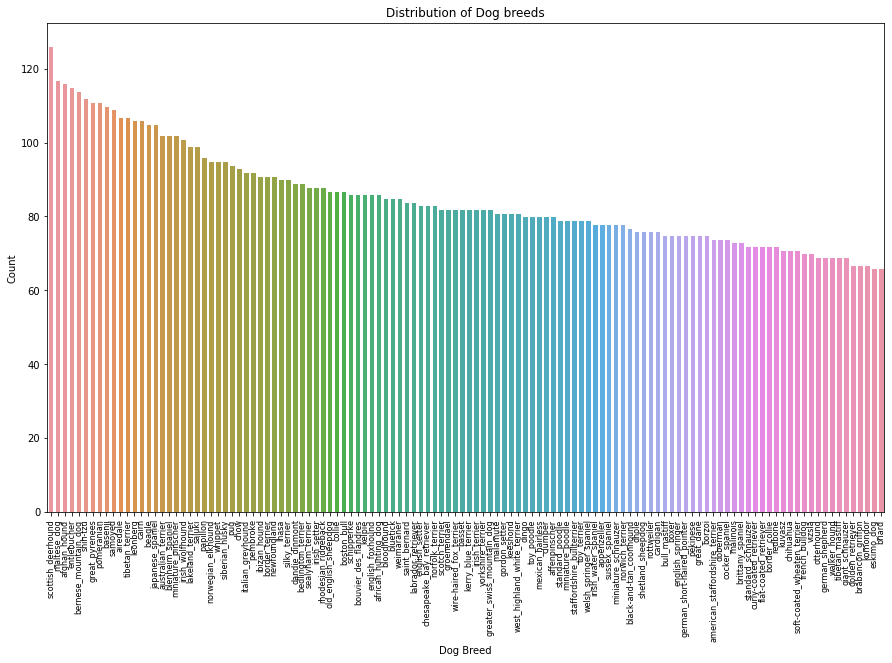

In [ ]:
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

yy = pd.value_counts(labels['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.show()

# Building a basic CNN to test on the data.

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# dimensions of the images
img_width, img_height = 224, 224
train_data_dir = '/content/drive/MyDrive/Final_Project/train'
validation_data_dir = '/content/drive/MyDrive/Final_Project/val'
nb_train_samples = 4800
nb_validation_samples = 600
epochs = 25
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('softmax'))
model.compile( tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### **Data Augmentation** and trial Training NN

In [13]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    #batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    #batch_size=batch_size,
    class_mode='categorical')

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('final_scratch.h5')

Found 4800 images belonging to 120 classes.
Found 600 images belonging to 120 classes.
Epoch 1/25
150/150 [==============================] - 101s 663ms/step - loss: 4.8066 - accuracy: 0.0044 - val_loss: 4.7875 - val_accuracy: 0.0087
Epoch 2/25
150/150 [==============================] - 93s 620ms/step - loss: 4.7884 - accuracy: 0.0073 - val_loss: 4.7867 - val_accuracy: 0.0087
Epoch 3/25
150/150 [==============================] - 93s 619ms/step - loss: 4.7876 - accuracy: 0.0075 - val_loss: 4.7805 - val_accuracy: 0.0174
Epoch 4/25
150/150 [==============================] - 93s 621ms/step - loss: 4.7731 - accuracy: 0.0113 - val_loss: 4.7247 - val_accuracy: 0.0208
Epoch 5/25
150/150 [==============================] - 93s 623ms/step - loss: 4.7213 - accuracy: 0.0158 - val_loss: 4.6747 - val_accuracy: 0.0191
Epoch 6/25
150/150 [==============================] - 93s 623ms/step - loss: 4.6851 - accuracy: 0.0217 - val_loss: 4.6313 - val_accuracy: 0.0174
Epoch 7/25
150/150 [======================

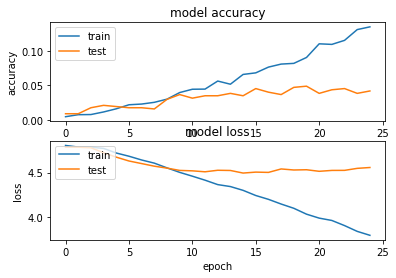

In [14]:
# summarize history for accuracy  
  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

model prediction tested on data prepered (120 breeds - 50 photos each, devided to 40-train 5-validation ans 5-test)

In [15]:
model.load_weights('/content/drive/MyDrive/Final_Project/final_scratch.h5')

print('For training set:')
report_accuracy(train_tensors, train_targets)

print('For validation set:')
report_accuracy(val_tensors, val_targets)

print('For test set:')
report_accuracy(test_tensors, test_targets)

For training set:
The Number of Test images are: 4800
Test accuracy: 38.1667%
For validation set:
The Number of Test images are: 600
Test accuracy: 4.3333%
For test set:
The Number of Test images are: 600
Test accuracy: 5.0000%


# Experiment number 1: VGG16 — Sigmoid Activation in the Top Layer

In the first experiment, we will try the Sigmoid activation top layer - Sigmoid gives values between 0-1 so with a small amount of data we will not be able to achieve high accuracy

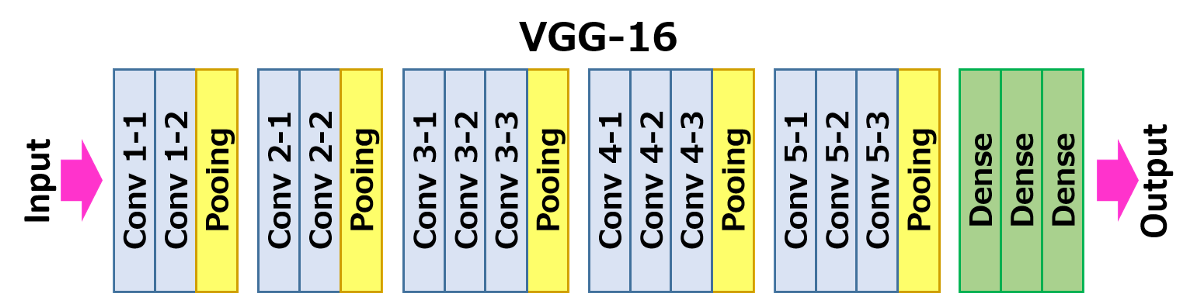

on top of the original model i'll be adding 4 more layers, from which 2 will be fully connected for multiclass classification (the last one in this experiment will be Sigmoid activation)

### Data Preprocessing for VGG16

In [ ]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  

# dimensions of our images  
img_width, img_height = 224, 224  

train_data_dir = '/content/drive/MyDrive/Final_Project/train'  
validation_data_dir = '/content/drive/MyDrive/Final_Project/val'  
test_data_dir = '/content/drive/MyDrive/Final_Project/test'  
   
 # number of epochs to train top model  
epochs = 50  
 # batch size used by flow_from_directory and predict_generator  
batch_size = 16  

In [ ]:
model = applications.vgg16.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)  
# data augmentation 
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = model.predict_generator(  
     generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)  

Found 4800 images belonging to 120 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


In [ ]:
# data augmentation
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = model.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

Found 600 images belonging to 120 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


In [ ]:
# data augmentation
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
 # load the bottleneck features saved earlier  
train_data = np.load('/content/drive/MyDrive/Final_Project/bottleneck_features_train.npy')  
   
 # get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)  

Found 4800 images belonging to 120 classes.


In [ ]:
# data augmentation
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('/content/drive/MyDrive/Final_Project/bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

Found 600 images belonging to 120 classes.


### Model with Sigmoid activation in the top layer

In [ ]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='sigmoid'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights('vgg16_sigmoid_model.h5')  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss)) 

Epoch 1/50
300/300 [==============================] - 2s 6ms/step - loss: 5.0397 - accuracy: 0.0060 - val_loss: 4.7876 - val_accuracy: 0.0083
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 4.8369 - accuracy: 0.0065 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8092 - accuracy: 0.0094 - val_loss: 4.8405 - val_accuracy: 0.0100
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8109 - accuracy: 0.0081 - val_loss: 4.7858 - val_accuracy: 0.0083
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8174 - accuracy: 0.0108 - val_loss: 4.7852 - val_accuracy: 0.0083
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8062 - accuracy: 0.0100 - val_loss: 4.7860 - val_accuracy: 0.0083
Epoch 7/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8051 - accuracy: 0.0098 - val_loss: 4.7905 - val_accuracy: 0.0083
Epoch 

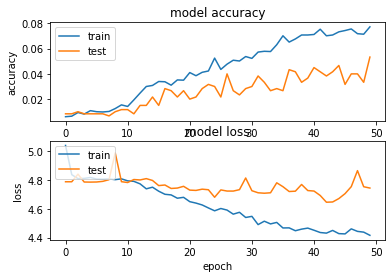

In [ ]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

# Experiment number 2: VGG16 — Softmax Activation in the Top Layer

On the other hand, the softmax activation will give use more accuracy but again, with a small amount of data it will not be accurate

In [ ]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))  
model.add(Dense(num_classes, activation='softmax'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights('vgg16_softmax_model.h5')  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss)) 

Epoch 1/50
300/300 [==============================] - 2s 6ms/step - loss: 5.0175 - accuracy: 0.0058 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8348 - accuracy: 0.0069 - val_loss: 4.8035 - val_accuracy: 0.0067
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 4.8125 - accuracy: 0.0085 - val_loss: 4.7871 - val_accuracy: 0.0083
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8039 - accuracy: 0.0083 - val_loss: 5.2243 - val_accuracy: 0.0100
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8148 - accuracy: 0.0131 - val_loss: 4.7887 - val_accuracy: 0.0050
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8109 - accuracy: 0.0121 - val_loss: 4.7968 - val_accuracy: 0.0100
Epoch 7/50
300/300 [==============================] - 2s 5ms/step - loss: 4.8024 - accuracy: 0.0127 - val_loss: 4.7831 - val_accuracy: 0.0083
Epoch 

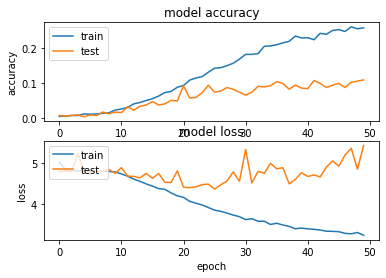

In [ ]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

To conclude the VGG-16:
> with Sigmoid we saw a result of accuracy: accuracy: 5.33% and  Loss: 4.7439117431640625

> with softmax we saw aresult of accuracy: 11.00% and Loss: 5.423671245574951

There was an improvement  in the accuracy

# Experiment number 3: MobileNet with Softmax

The MobileNet has a streamlined architecture, with depth-wise separable convolutions, which is a major strength of this model.
It is applicable to both face attribute object detection and fine-grained recognition, so hopefully it will give better results than the VGG16

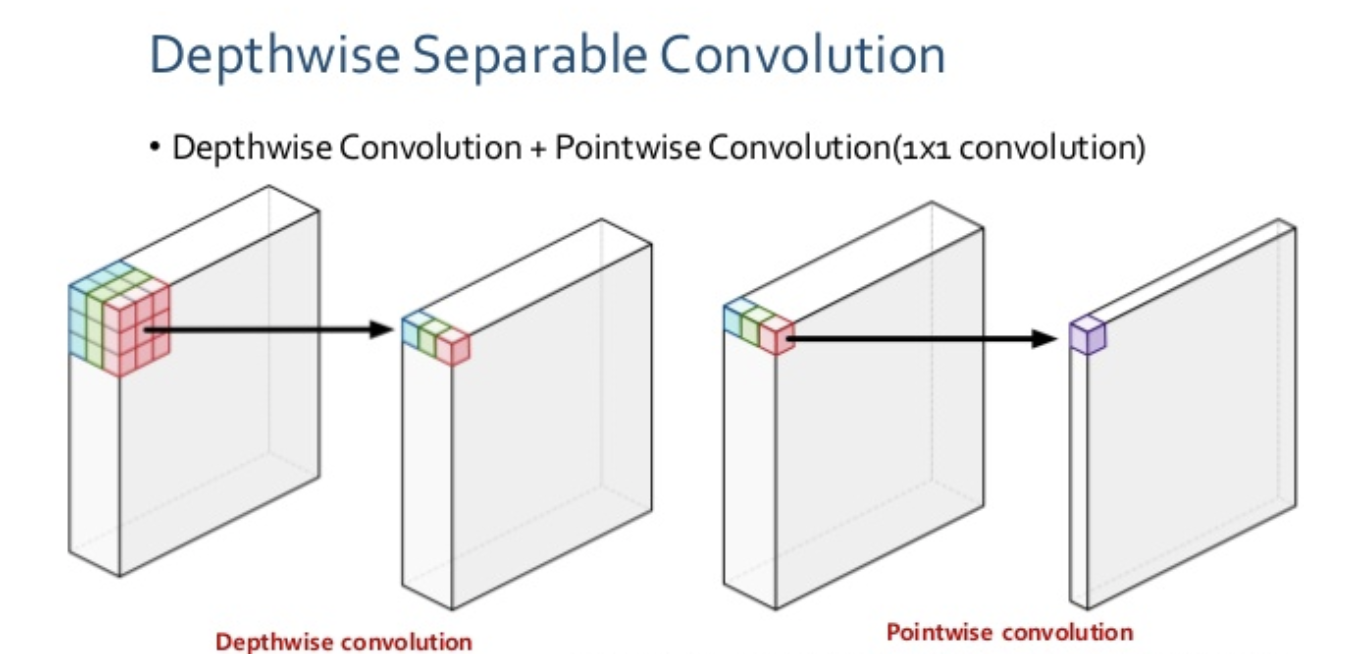

### imports and data preprocessing 

In [ ]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  

# dimensions of our images 
img_width, img_height = 224, 224  

weights_path = 'mobilenet_model.h5'  
train_data_dir = '/content/drive/MyDrive/Final_Project/train'  
validation_data_dir = '/content/drive/MyDrive/Final_Project/val'  
test_data_dir = '/content/drive/MyDrive/Final_Project/test'  
   
 # number of epochs to train top model  
epochs = 50  
 # batch size used by flow_from_directory and predict_generator  
batch_size = 8 

Using TensorFlow backend.

In [ ]:
model = applications.mobilenet.MobileNet(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)  

# data augmentation  
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = model.predict_generator(  
     generator, predict_size_train)  
   
np.save('bottleneck_features_train_mob.npy', bottleneck_features_train)  

Found 4800 images belonging to 120 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


In [ ]:
# data augmentation
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = model.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation_mob.npy', bottleneck_features_validation) 

Found 600 images belonging to 120 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


In [ ]:
# data augmentation
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
 # load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train_mob.npy')  
   
 # get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)  

Found 4800 images belonging to 120 classes.


In [ ]:
# data augmentation
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation_mob.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

Found 600 images belonging to 120 classes.


### Building the model and running it

In [ ]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights(weights_path)  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss)) 

Epoch 1/50
600/600 [==============================] - 6s 9ms/step - loss: 5.5892 - accuracy: 0.0148 - val_loss: 4.7089 - val_accuracy: 0.0250
Epoch 2/50
600/600 [==============================] - 5s 8ms/step - loss: 4.7987 - accuracy: 0.0269 - val_loss: 4.6611 - val_accuracy: 0.0533
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 4.7508 - accuracy: 0.0425 - val_loss: 4.6301 - val_accuracy: 0.0550
Epoch 4/50
600/600 [==============================] - 5s 8ms/step - loss: 4.7131 - accuracy: 0.0398 - val_loss: 5.8523 - val_accuracy: 0.0450
Epoch 5/50
600/600 [==============================] - 5s 8ms/step - loss: 4.6630 - accuracy: 0.0533 - val_loss: 4.5474 - val_accuracy: 0.0667
Epoch 6/50
600/600 [==============================] - 5s 8ms/step - loss: 4.6792 - accuracy: 0.0604 - val_loss: 4.5527 - val_accuracy: 0.0767
Epoch 7/50
600/600 [==============================] - 5s 9ms/step - loss: 4.5988 - accuracy: 0.0669 - val_loss: 4.5366 - val_accuracy: 0.0733
Epoch 

Visualize the result

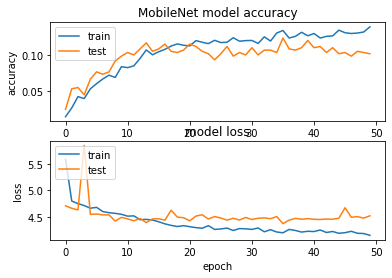

In [ ]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('MobileNet model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

> In this experiment we got more consistant results between the train to the test data.
accuracy: 10.17%
Loss: 4.5188422203063965

# Experiment number 4 (The Chosen architecture):  Inception V3

The model that we found to be the best performing on our dog dataset was the Inception V3. This image recognition model has two main parts, feature extraction with a CNN and a classification aspect with both fully connected and softmax layers.

### Imports Data preprocessing


In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.datasets import load_files       
from keras.utils import np_utils
from glob import glob
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.applications import inception_v3
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline               

labels=pd.read_csv('/content/drive/MyDrive/Semester1_FinalProject/labels.csv')
target=labels.set_index('id')
target=target.to_dict()['breed']

### Assistance functions

In [ ]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

# define function to load train, test, and validation datasets
def load_dataset(path):
    #Load text files with categories as subfolder names.
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 120)
    return dog_files, dog_targets

In [ ]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset('/content/drive/MyDrive/Final_Project/train')
val_files, val_targets = load_dataset('/content/drive/MyDrive/Final_Project/val')
test_files, test_targets = load_dataset('/content/drive/MyDrive/Final_Project/test')

# load list of dog breed names
breeds = [item[21:-1] for item in sorted(glob("train_val_test/train/*/"))]

In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras - Converts to (224, 224) and converts into a numpy array using PIL.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
val_tensors = paths_to_tensor(val_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 600/600 [00:03<00:00, 187.28it/s]


In [ ]:
input_size=224
num_classes=120
S=1
train_len=len(train_files)

# getting the features
inception_bottleneck=inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling='avg')
train_i_bf = inception_bottleneck.predict(train_tensors, batch_size=32, verbose=1)
val_i_bf = inception_bottleneck.predict(val_tensors, batch_size=32, verbose=1)
test_i_bf = inception_bottleneck.predict(test_tensors, batch_size=32, verbose=1)
print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(val_i_bf.shape, val_i_bf.size))
print('InceptionV3 test bottleneck features shape: {} size: {:,}'.format(test_i_bf.shape, test_i_bf.size))

19/19 [==============================] - 1s 71ms/step
InceptionV3 train bottleneck features shape: (4800, 2048) size: 9,830,400
InceptionV3 valid bottleneck features shape: (600, 2048) size: 1,228,800
InceptionV3 test bottleneck features shape: (600, 2048) size: 1,228,800


### Saving the bottleneck feature

In [ ]:
np.save('/content/drive/MyDrive/Final_Project/bottleneck_features_train_inception.npy', train_i_bf) 
np.save('/content/drive/MyDrive/Final_Project/bottleneck_features_val_inception.npy', val_i_bf) 
np.save('/content/drive/MyDrive/Final_Project/bottleneck_features_test_inception.npy', test_i_bf) 

### Building and trainig the Model

In [ ]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math

# load the bottleneck features saved earlier  
train_data = np.load('/content/drive/MyDrive/Final_Project/bottleneck_features_train_inception.npy') 
val_data = np.load('/content/drive/MyDrive/Final_Project/bottleneck_features_val_inception.npy') 
test_data = np.load('/content/drive/MyDrive/Final_Project/bottleneck_features_test_inception.npy') 
batch_size=32
epochs=75

model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))  
model.add(Dense(num_classes, activation='softmax'))  
   
model.compile(optimizer='Adam',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_targets,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(val_data, val_targets))  
   
model.save_weights('/content/drive/MyDrive/Final_Project/inception_model_2.h5')  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     val_data, val_targets, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss)) 

Epoch 1/75
150/150 [==============================] - 1s 5ms/step - loss: 3.0765 - accuracy: 0.3292 - val_loss: 1.0306 - val_accuracy: 0.7467
Epoch 2/75
150/150 [==============================] - 0s 3ms/step - loss: 1.3323 - accuracy: 0.6521 - val_loss: 0.8221 - val_accuracy: 0.7717
Epoch 3/75
150/150 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.7040 - val_loss: 0.8142 - val_accuracy: 0.7600
Epoch 4/75
150/150 [==============================] - 0s 3ms/step - loss: 0.9211 - accuracy: 0.7377 - val_loss: 0.8137 - val_accuracy: 0.7633
Epoch 5/75
150/150 [==============================] - 1s 5ms/step - loss: 0.8010 - accuracy: 0.7585 - val_loss: 0.8142 - val_accuracy: 0.7617
Epoch 6/75
150/150 [==============================] - 1s 5ms/step - loss: 0.7387 - accuracy: 0.7804 - val_loss: 0.7749 - val_accuracy: 0.7717
Epoch 7/75
150/150 [==============================] - 1s 5ms/step - loss: 0.6637 - accuracy: 0.7948 - val_loss: 0.8558 - val_accuracy: 0.7583
Epoch 

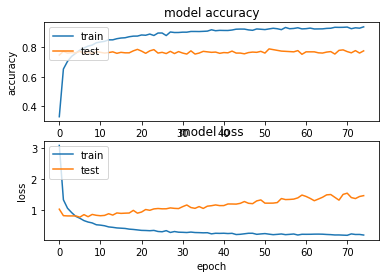

In [ ]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
  
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

# Summry



---


To sum up our report, I would like to emphasize the crucial importance of transfer learning. As we saw in the 4 experiments, to manage a small amount of data and train a model, and then test it, we must use transfer learning to receive good results. There is a difference between the sigmoid and the softmax as we saw in the first and the second experiments with VGG-16.

The best result has been achieved with the Inception V3 transfer learning model.



---



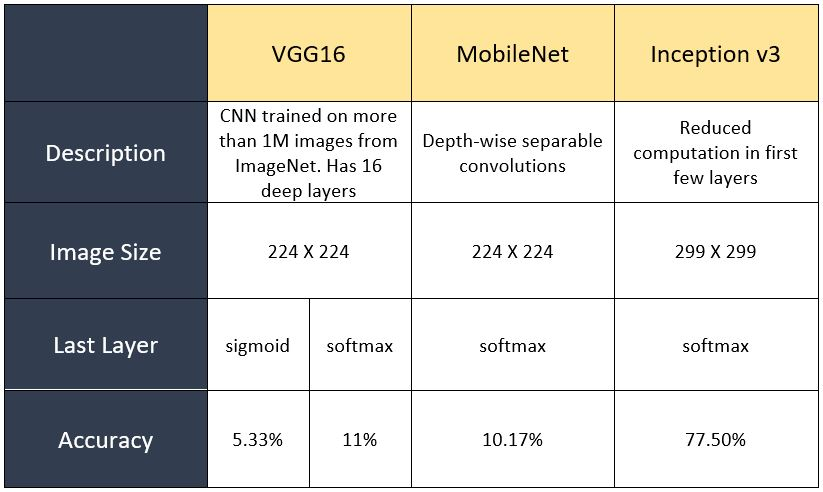